In [8]:
import numpy as np
import pandas as pd

In [9]:
advertising=pd.read_csv('advertising.csv')
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [10]:
advertising = (advertising - advertising.mean())/advertising.std()
advertising.head()

,TV,Radio,Newspaper,Sales
0,0.967425,0.979066,1.774493,1.548168
1,-1.194379,1.080097,0.667903,-0.694304
2,-1.512360,1.524637,1.779084,-0.905135
3,0.051919,1.214806,1.283185,0.858177
4,0.393196,-0.839507,1.278593,-0.215143


In [11]:
# Putting feature variable to X
X = advertising[['TV','Radio','Newspaper']]
# Putting response variable to y
y = advertising['Sales']
X['intercept'] = 1
X = X.reindex_axis(['intercept','TV','Radio','Newspaper'], axis=1)
X.head()

,intercept,TV,Radio,Newspaper
0,1,0.967425,0.979066,1.774493
1,1,-1.194379,1.080097,0.667903
2,1,-1.512360,1.524637,1.779084
3,1,0.051919,1.214806,1.283185
4,1,0.393196,-0.839507,1.278593


In [12]:
X = np.array(X)
y = np.array(y)
theta = np.matrix(np.array([0,0,0,0])) 
alpha = 0.01
iterations = 1000

In [13]:
def compute_cost(X, y, theta):
    return np.sum(np.square(np.matmul(X, theta) - y)) / (2 * len(y))

In [14]:
def gradient_descent_multi(X, y, theta, alpha, iterations):
    theta = np.zeros(X.shape[1])
    print(X.shape[1],theta)
    m = len(X)
    gdm_df = pd.DataFrame( columns = ['Bets','cost'])

    for i in range(iterations):
        gradient = (1/m) * np.matmul(X.T, np.matmul(X, theta) - y)
        theta = theta - alpha * gradient
        cost = compute_cost(X, y, theta)
        gdm_df.loc[i] = [theta,cost]

    return gdm_df

In [16]:
result=gradient_descent_multi(X, y, theta, alpha, iterations)

4 [ 0.  0.  0.  0.]


In [22]:
result.iloc[999]

Bets    [2.65482080763e-16, 0.753028969927, 0.53605511...
cost                                            0.0511378
Name: 999, dtype: object

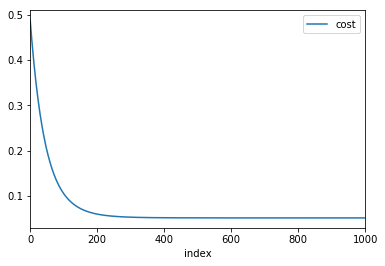

In [26]:
%matplotlib inline
result.reset_index().plot.line(x='index', y=['cost'])

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
y=advertising['Sales']
X=advertising['TV']
# 1. Create the datasets X_train, y_train, X_test and y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 , random_state=100)
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))
print(len(X_train))
print(len(y_train))
print(X_train.shape)
X_train=X_train[:,np.newaxis]
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
print(lr.intercept_)
print(lr.coef_)

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
140
140
(140,)
-0.0375175655877
[ 0.76512285]


In [33]:
result.head()

,Bets,cost
0,"[-5.0404125318e-18, 0.00778313302737, 0.005733...",0.487696
1,"[-1.00364161426e-17, 0.01548441682, 0.01139753...",0.478118
2,"[-1.50546242139e-17, 0.0231047301663, 0.016993...",0.468760
3,"[-1.97619698383e-17, 0.0306449421912, 0.022521...",0.459617
4,"[-2.42916797788e-17, 0.0381059124656, 0.027983...",0.450683


In [1]:
import pandas as pd
slr=pd.read_csv('slr_csv_2.csv')
slr.head()

,marketing Budget,Sales
0,127.4,10.5
1,364.4,21.4
2,150.0,10.0
3,128.7,9.6
4,285.9,17.4


In [5]:
print(slr.shape)
import matplotlib.pyplot as plt
import seaborn as sns

(17, 2)


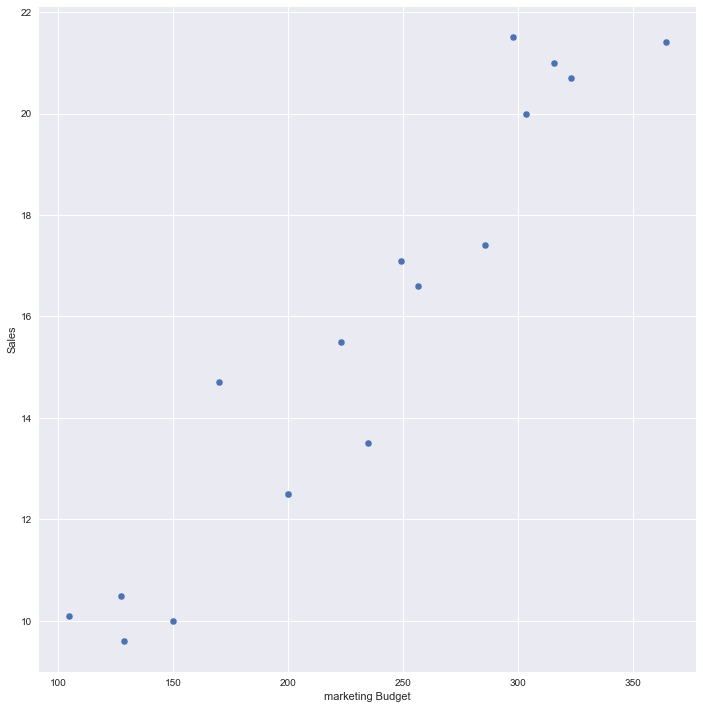

In [8]:
%matplotlib inline
sns.pairplot(slr, x_vars='marketing Budget', y_vars='Sales',size=10, kind='scatter')


In [9]:
from sklearn.cross_validation import train_test_split

In [12]:
X=slr['marketing Budget']
y=slr['Sales']
print(type(X))
print(type(y))
print(X.head())

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
0    127.4
1    364.4
2    150.0
3    128.7
4    285.9
Name: marketing Budget, dtype: float64


In [13]:
X_train,X_test, y_train, y_test=train_test_split(X,y,train_size=.7, random_state=100)

In [14]:
import numpy as np
print(type(X_train))
print(type(X_test))
X_train=X_train[:,np.newaxis]
X_test=X_test[:,np.newaxis]
print(type(X_train))
print(type(X_test))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [17]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
print(lr.intercept_)
print(lr.coef_)
print("Line Equation: y={}+{}x".format(lr.intercept_,lr.coef_))

2.23227503944
[ 0.05726584]
Line Equation: y=2.232275039441765+[ 0.05726584]x


In [24]:
y_pred=lr.predict(X_test)
print(type(y_pred))
y_pred[:3]
print(y_test.shape)
print(y_pred.shape)

<class 'numpy.ndarray'>
(6,)
(6,)


In [ ]:

c = [i for i in range(1,61,1)]         # generating index 
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Sales', fontsize=16)   

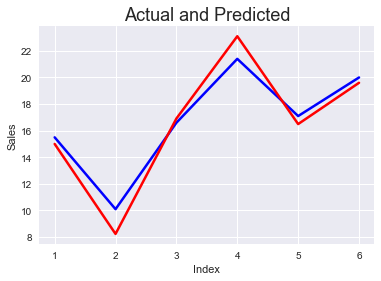

In [27]:
import matplotlib.pyplot as plt
c= [i for i in range(1,7,1)]
fig=plt.figure()
plt.plot(c,y_test,color='blue',linewidth=2.5, linestyle='-')
plt.plot(c,y_pred,color='red',linewidth=2.5, linestyle='-')
plt.xlabel('Index')
plt.ylabel('Sales')
plt.title('Actual and Predicted', fontsize=18)

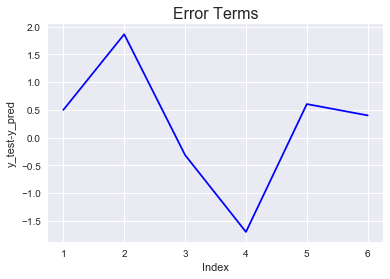

In [29]:
fig=plt.figure()
c=[i for i in range(1,7,1)]
plt.plot(c,y_test-y_pred,color='blue',linestyle='-')
plt.title('Error Terms',fontsize=16)
plt.xlabel('Index')
plt.ylabel('y_test-y_pred')

In [31]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 1.20346957872
r_square_value : 0.907553814502


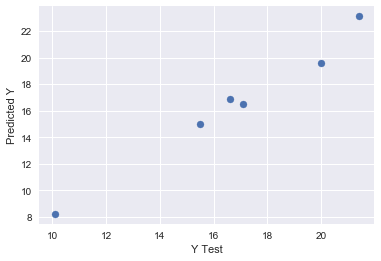

In [33]:
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [34]:
#Without Split
X_train=X[:,np.newaxis]
print(type(X_train))
y_train=y[:,np.newaxis]
print(type(y_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [36]:
lr.fit(X_train,y_train)
print(lr.intercept_)
print(lr.coef_)

[ 3.35249683]
[[ 0.05276727]]


In [42]:
print("Equation of line: y= {}+{}x".format(lr.intercept_[0],lr.coef_[0][0]))

Equation of line: y= 3.3524968264935975+0.052767271744003884x
